In [15]:
import pandas as pd 
import numpy as np 
# from pandas_profiling import ProfileReport

import seaborn as sns  
import matplotlib.pyplot as plt

# plt.rcParams['figure.dpi'] = 150
# plt.style.use('seaborn-deep')
# pd.set_option('display.max_columns', None)

In [26]:
path = ('../EDA-Real-Estate/_data.csv')
df = pd.read_csv(path, index_col= 0)
df.head(5)

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


**В связи с тем, что колонка "Тип" представлена единственным значением - "квартира", удаляем данный столбец как неинформативный для целей исследования**

In [17]:
df.drop(columns=['Тип'],axis=1,inplace=True)

**Аналогично поступаем с колонками "Телефоны","Описание","Площадь комнат","Окна",
"Дополнительно","Ссылка на объявление"**

In [18]:
df.drop(columns=['Телефоны','Описание','Площадь комнат, м2','Окна','Дополнительно','Ссылка на объявление'],axis=1,inplace=True)

**В связи с большим количество отсутствующих данных удалим столбцы "Название ЖК" и "Серия дома"**

***Missing values***

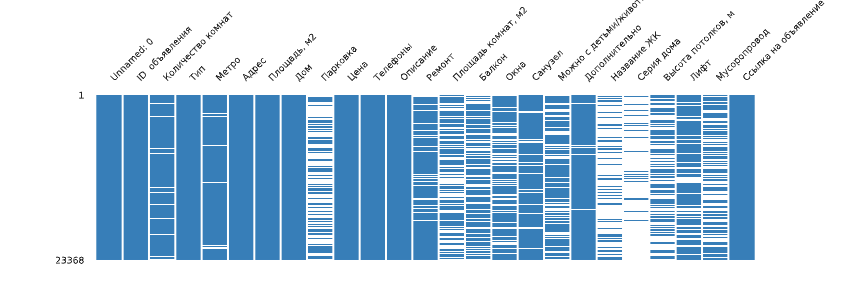

In [19]:
df.drop(columns=['Серия дома','Название ЖК',],axis=1,inplace=True)

**Перечень колонок, оставшихся в dataset**

In [20]:
df.columns

Index(['ID  объявления', 'Количество комнат', 'Метро', 'Адрес', 'Площадь, м2',
       'Дом', 'Парковка', 'Цена', 'Ремонт', 'Балкон', 'Санузел',
       'Можно с детьми/животными', 'Высота потолков, м', 'Лифт',
       'Мусоропровод'],
      dtype='object')

**Преобразуем колонку "Парковка" в бинарный вид, присвоив всем пустным значениям 0, всем остальным - 1**

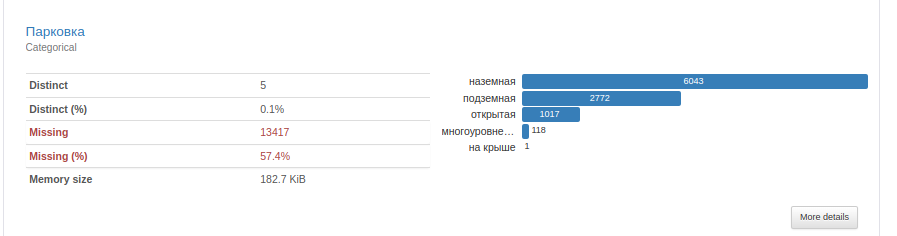

In [21]:
df['Парковка']=df['Парковка'].fillna(0)

In [22]:
df.loc[df['Парковка']!=0,'Парковка']=1

**Nan в колонке "Санузел" заменим на 1. Преобразуем колонку "Санузел" в две колонки: "Тип cанузла"(раздельный 1,совместный 0) и "Количество санузлов".**

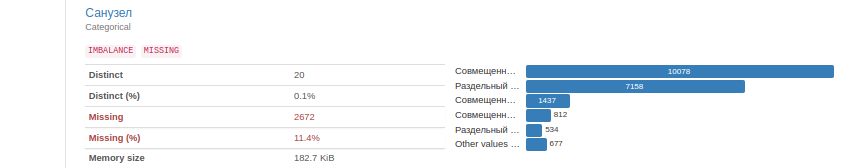

In [23]:
df['Санузел']=df['Санузел'].fillna(1)

In [24]:
df.insert(12, "Тип cанузла", 0)

In [25]:
df.insert(13, "Количество санузлов", 0)